In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

In [2]:
import glob

# 파일 경로 패턴 설정
file_paths = glob.glob('/Users/kimgayeong/Desktop/파이널/2.신용정보/*.parquet')

# 파일들을 읽어서 리스트에 담고 모두 concat
df_list = [pd.read_parquet(path) for path in file_paths]
train_df = pd.concat(df_list, ignore_index=True)

# 확인
print(train_df.shape)
train_df.head()

(2400000, 42)


,기준년월,ID,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,...,연체감액여부_R3M,한도심사요청건수,한도요청거절건수,한도심사요청후경과월,한도심사거절후경과월,시장단기연체여부_R6M,시장단기연체여부_R3M,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일
0,201810,TRAIN_000000,0,19724,5990,0,0,22.995321,18.481194,18.121342,...,0,0회,0,3,3,0,0,0,0,99999999
1,201810,TRAIN_000001,0,9997,4643,42214,92292,14.809244,15.522862,10.793073,...,0,0회,0,3,3,0,0,0,0,322
2,201810,TRAIN_000002,0,86125,32485,0,0,21.934388,18.367193,17.680993,...,0,0회,0,3,3,0,0,0,0,2374
3,201810,TRAIN_000003,0,19048,10065,0,0,22.999954,22.999954,19.210532,...,0,0회,0,3,3,0,0,0,0,99999999
4,201810,TRAIN_000004,0,176764,52253,47996,156564,14.700813,11.898927,10.267081,...,0,0회,0,3,3,0,0,0,0,99999999


In [3]:
train_df.tail()

,기준년월,ID,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,...,연체감액여부_R3M,한도심사요청건수,한도요청거절건수,한도심사요청후경과월,한도심사거절후경과월,시장단기연체여부_R6M,시장단기연체여부_R3M,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일
2399995,201811,TRAIN_399995,0,20677,7715,0,54676,15.204317,11.899371,10.402842,...,0,0회,0,3,3,0,0,0,0,99999999
2399996,201811,TRAIN_399996,0,85594,30880,0,156200,14.815354,15.628568,11.022244,...,0,0회,0,3,3,0,0,0,0,99999999
2399997,201811,TRAIN_399997,0,53574,18017,0,0,16.961238,16.292944,13.679558,...,0,0회,0,3,3,0,0,0,0,99999999
2399998,201811,TRAIN_399998,0,10003,2936,90000,180887,15.177413,11.900715,10.549119,...,0,0회,0,3,3,0,0,0,0,99999999
2399999,201811,TRAIN_399999,0,85770,27113,0,0,14.846076,15.539944,10.805809,...,0,0회,0,3,3,0,0,0,0,99999999


In [38]:
df[['기준년월']]

,기준년월
0,201810
1,201810
2,201810
3,201810
4,201810
...,...
2399995,201811
2399996,201811
2399997,201811
2399998,201811


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 42 columns):
 #   Column          Dtype  
---  ------          -----  
 0   기준년월            int64  
 1   ID              object 
 2   최초한도금액          int64  
 3   카드이용한도금액        int64  
 4   CA한도금액          int64  
 5   일시상환론한도금액       int64  
 6   월상환론한도금액        int64  
 7   CA이자율_할인전       float64
 8   CL이자율_할인전       float64
 9   RV일시불이자율_할인전    float64
 10  RV현금서비스이자율_할인전  float64
 11  RV신청일자          float64
 12  RV약정청구율         float64
 13  RV최소결제비율        float64
 14  자발한도감액횟수_R12M   object 
 15  자발한도감액금액_R12M   int64  
 16  자발한도감액후경과월      int64  
 17  강제한도감액횟수_R12M   int64  
 18  강제한도감액금액_R12M   int64  
 19  강제한도감액후경과월      int64  
 20  한도증액횟수_R12M     object 
 21  한도증액금액_R12M     int64  
 22  한도증액후경과월        int64  
 23  상향가능한도금액        int64  
 24  상향가능CA한도금액      int64  
 25  카드론동의여부         object 
 26  월상환론상향가능한도금액    int64  
 27  RV전환가능여부        object 
 28  일시불ONLY전환가능여

In [5]:
train_df.isnull().sum()

기준년월                    0
ID                      0
최초한도금액                  0
카드이용한도금액                0
CA한도금액                  0
일시상환론한도금액               0
월상환론한도금액                0
CA이자율_할인전               0
CL이자율_할인전               0
RV일시불이자율_할인전            0
RV현금서비스이자율_할인전          0
RV신청일자            1951236
RV약정청구율                 0
RV최소결제비율                0
자발한도감액횟수_R12M           0
자발한도감액금액_R12M           0
자발한도감액후경과월              0
강제한도감액횟수_R12M           0
강제한도감액금액_R12M           0
강제한도감액후경과월              0
한도증액횟수_R12M             0
한도증액금액_R12M             0
한도증액후경과월                0
상향가능한도금액                0
상향가능CA한도금액              0
카드론동의여부                 0
월상환론상향가능한도금액            0
RV전환가능여부            29473
일시불ONLY전환가능여부           0
카드이용한도금액_B1M            0
카드이용한도금액_B2M            0
특별한도보유여부_R3M            0
연체감액여부_R3M              0
한도심사요청건수                0
한도요청거절건수                0
한도심사요청후경과월              0
한도심사거절후경과월              0
시장단기연체여부_R6M            0
시장단기연체여부_R3M

In [6]:
#결측치 비율 확인
missing_ratio = (train_df.isnull().sum() / len(train_df)) * 100
print(missing_ratio.sort_values(ascending=False))

RV신청일자            81.301500
RV전환가능여부           1.228042
기준년월               0.000000
상향가능CA한도금액         0.000000
카드론동의여부            0.000000
월상환론상향가능한도금액       0.000000
일시불ONLY전환가능여부      0.000000
카드이용한도금액_B1M       0.000000
카드이용한도금액_B2M       0.000000
특별한도보유여부_R3M       0.000000
연체감액여부_R3M         0.000000
한도증액후경과월           0.000000
한도심사요청건수           0.000000
한도요청거절건수           0.000000
한도심사요청후경과월         0.000000
한도심사거절후경과월         0.000000
시장단기연체여부_R6M       0.000000
시장단기연체여부_R3M       0.000000
시장연체상환여부_R6M       0.000000
시장연체상환여부_R3M       0.000000
상향가능한도금액           0.000000
한도증액금액_R12M        0.000000
ID                 0.000000
한도증액횟수_R12M        0.000000
최초한도금액             0.000000
카드이용한도금액           0.000000
CA한도금액             0.000000
일시상환론한도금액          0.000000
월상환론한도금액           0.000000
CA이자율_할인전          0.000000
CL이자율_할인전          0.000000
RV일시불이자율_할인전       0.000000
RV현금서비스이자율_할인전     0.000000
RV약정청구율            0.000000
RV최소결제비율           0.000000
자발한도감액횟수_R12M      0

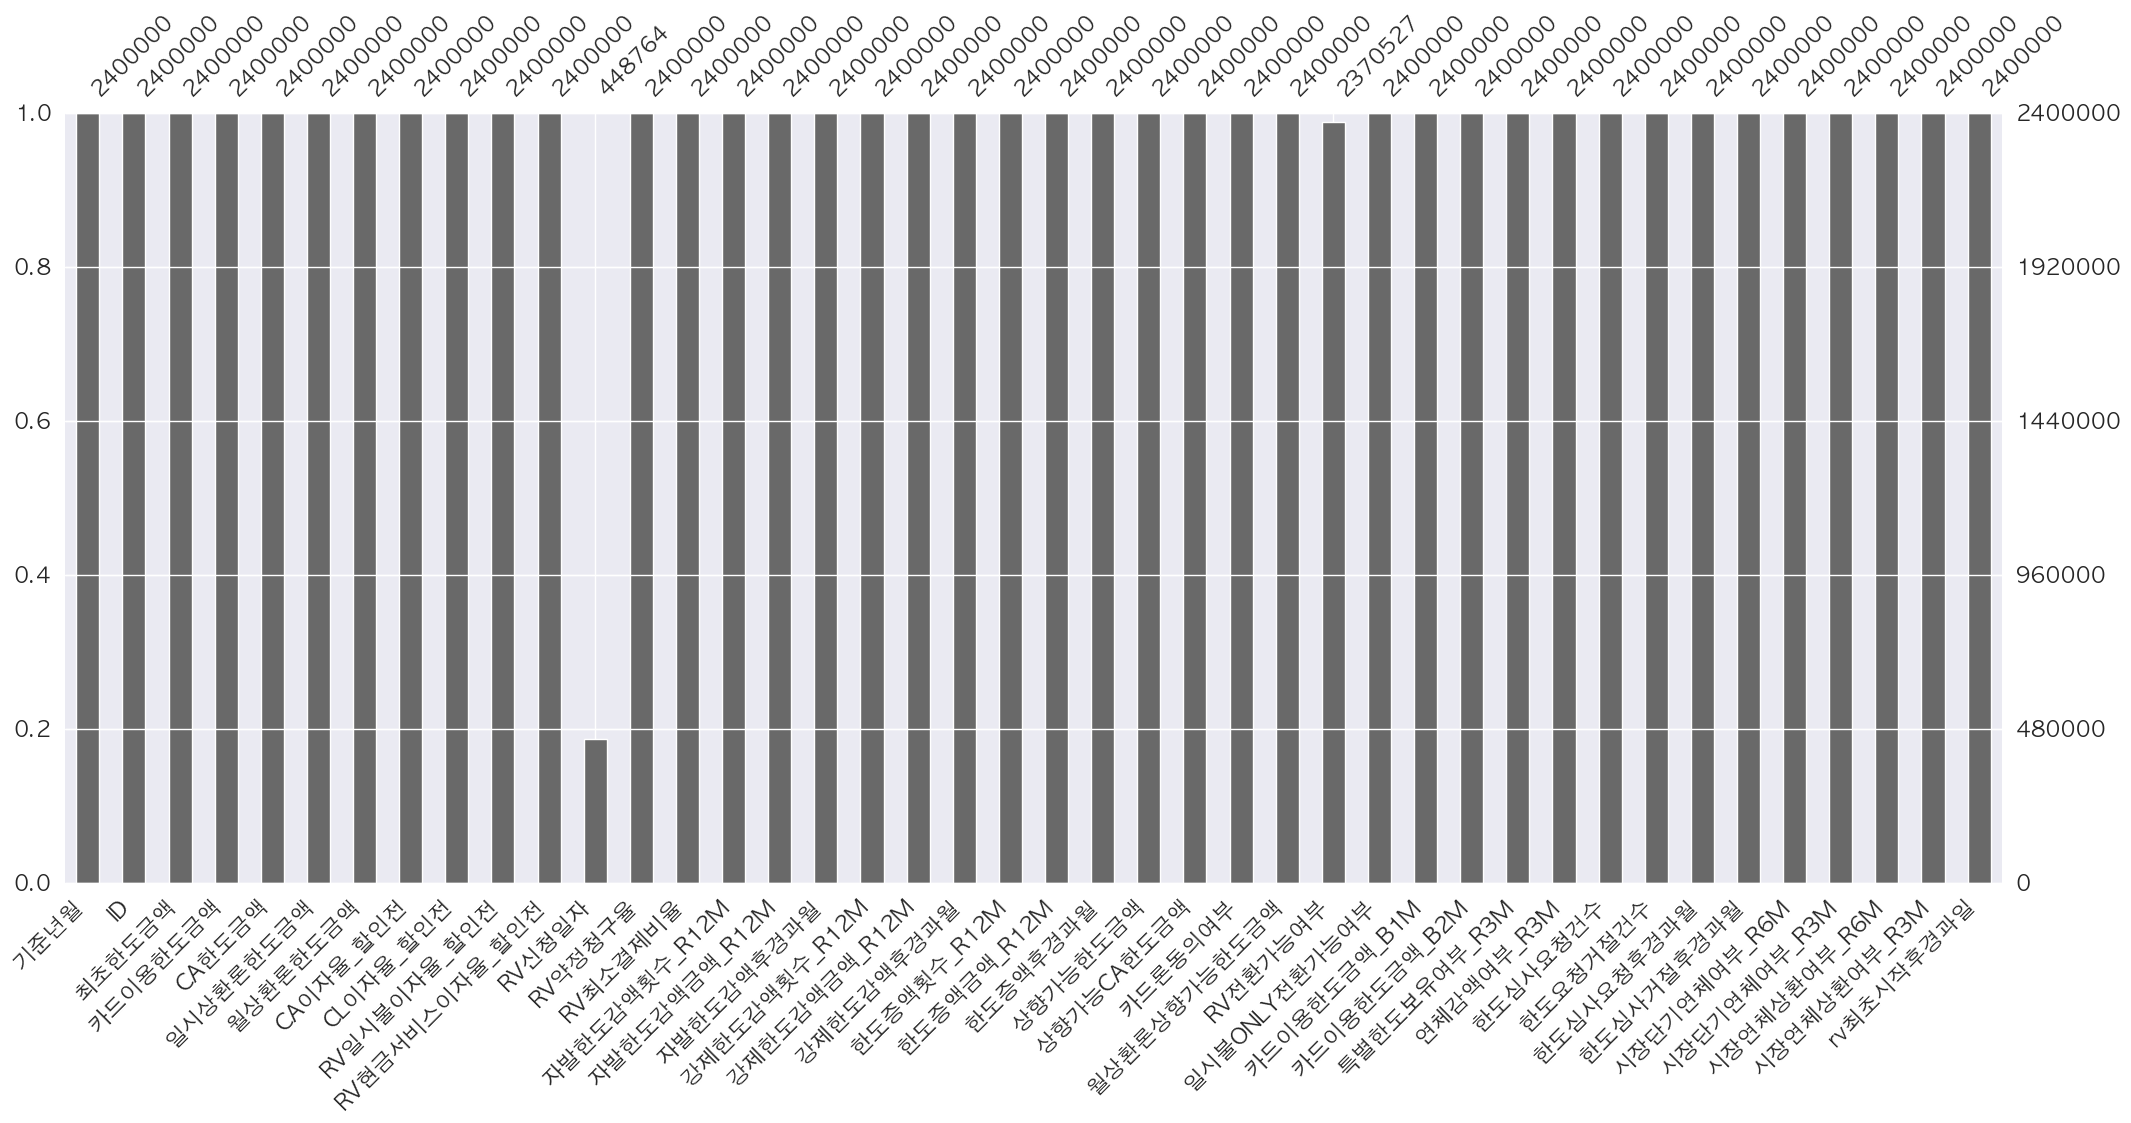

In [7]:
# 결측치 시각화를 위한 라이브러리
import missingno
# 각 컬럼별 결측치 현황을 막대 그래프 형태로 확인해본다.
# 결측치를 제외한 데이터 개수
missingno.bar(train_df)
plt.show()

<Axes: >

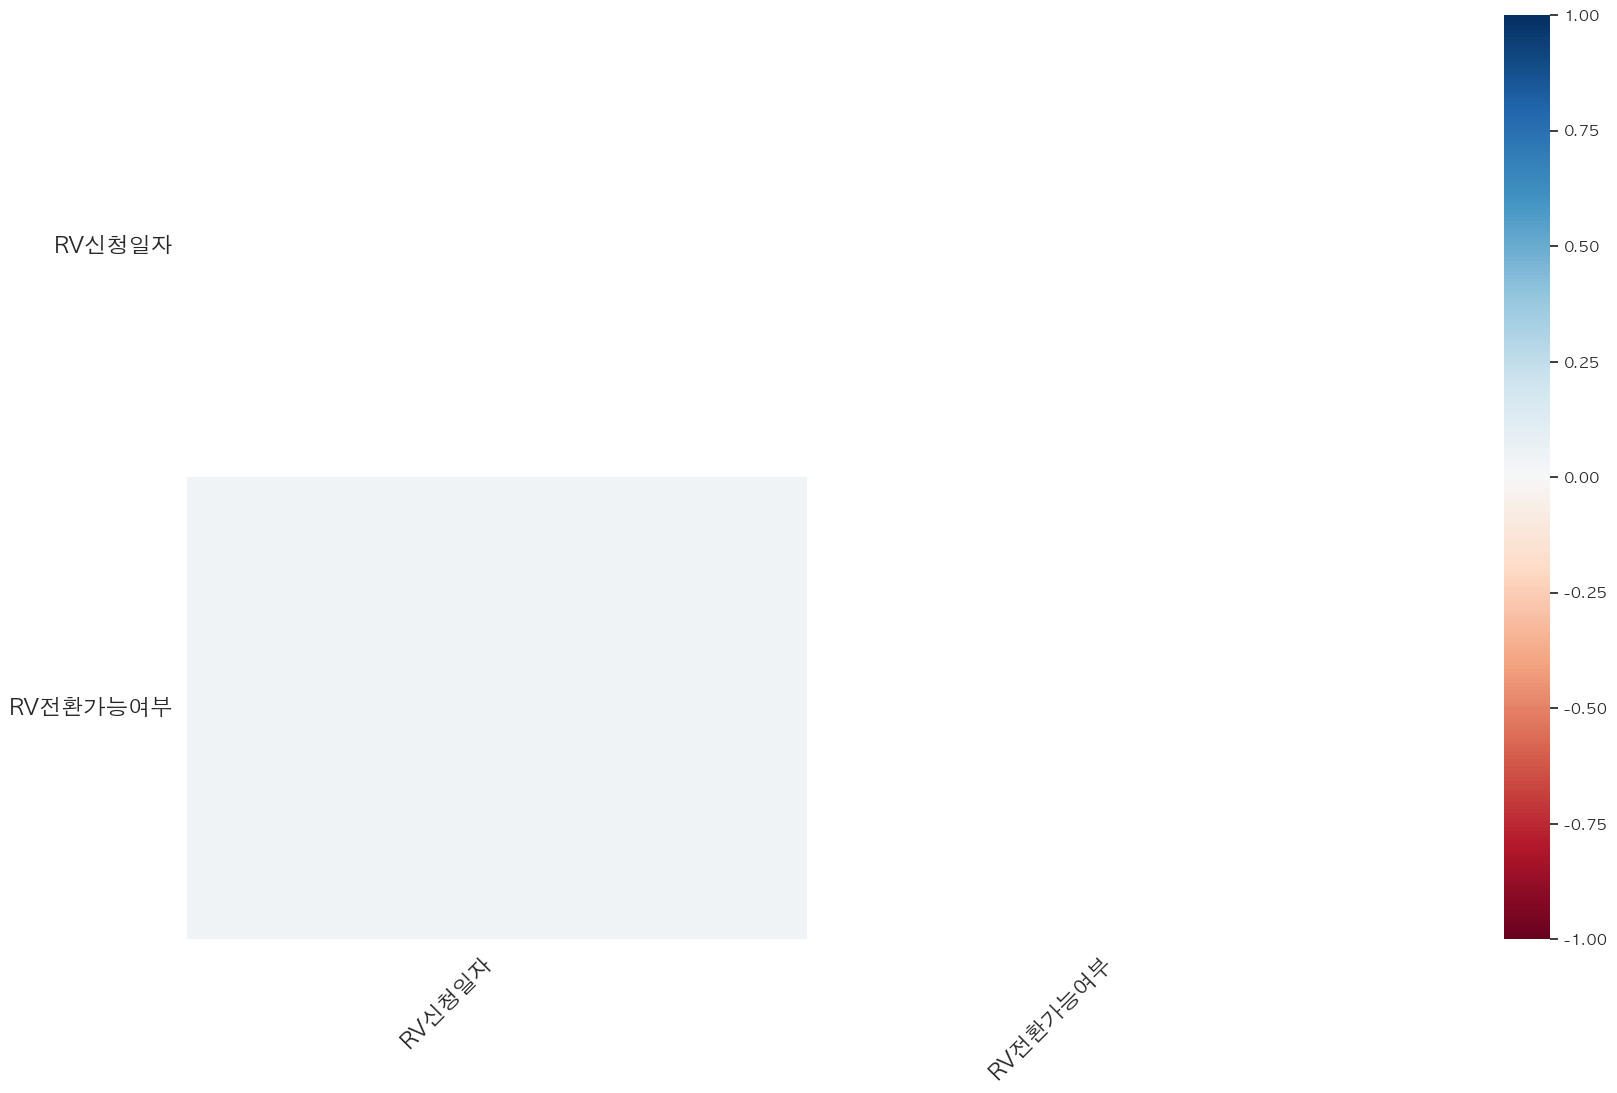

In [8]:
# 양의 상관 관계 : 하나의 변수에서 값이 누락될 때 다른 변수에서도 값이 누락될 가능성이 높은 것
# 음의 상관 관계 : 하나의 변수에서 값이 누락될 때 다른 변수에서는 값이 누락될 가능성이 낮은 것
# 0에 가까울 : 두 변수 값의 결측치값 유무가 서로 독립적이다.
missingno.heatmap(train_df)

In [9]:
# 결측률 0% 이상인 컬럼 삭제
drop_cols = missing_ratio[missing_ratio > 0].index.tolist()
train_df = train_df.drop(columns=drop_cols)

In [10]:
na_counts = train_df.isna().sum()
na_counts = na_counts[na_counts > 0]
print(na_counts.to_frame(name='결측치 개수'))

Empty DataFrame
Columns: [결측치 개수]
Index: []


<Axes: >

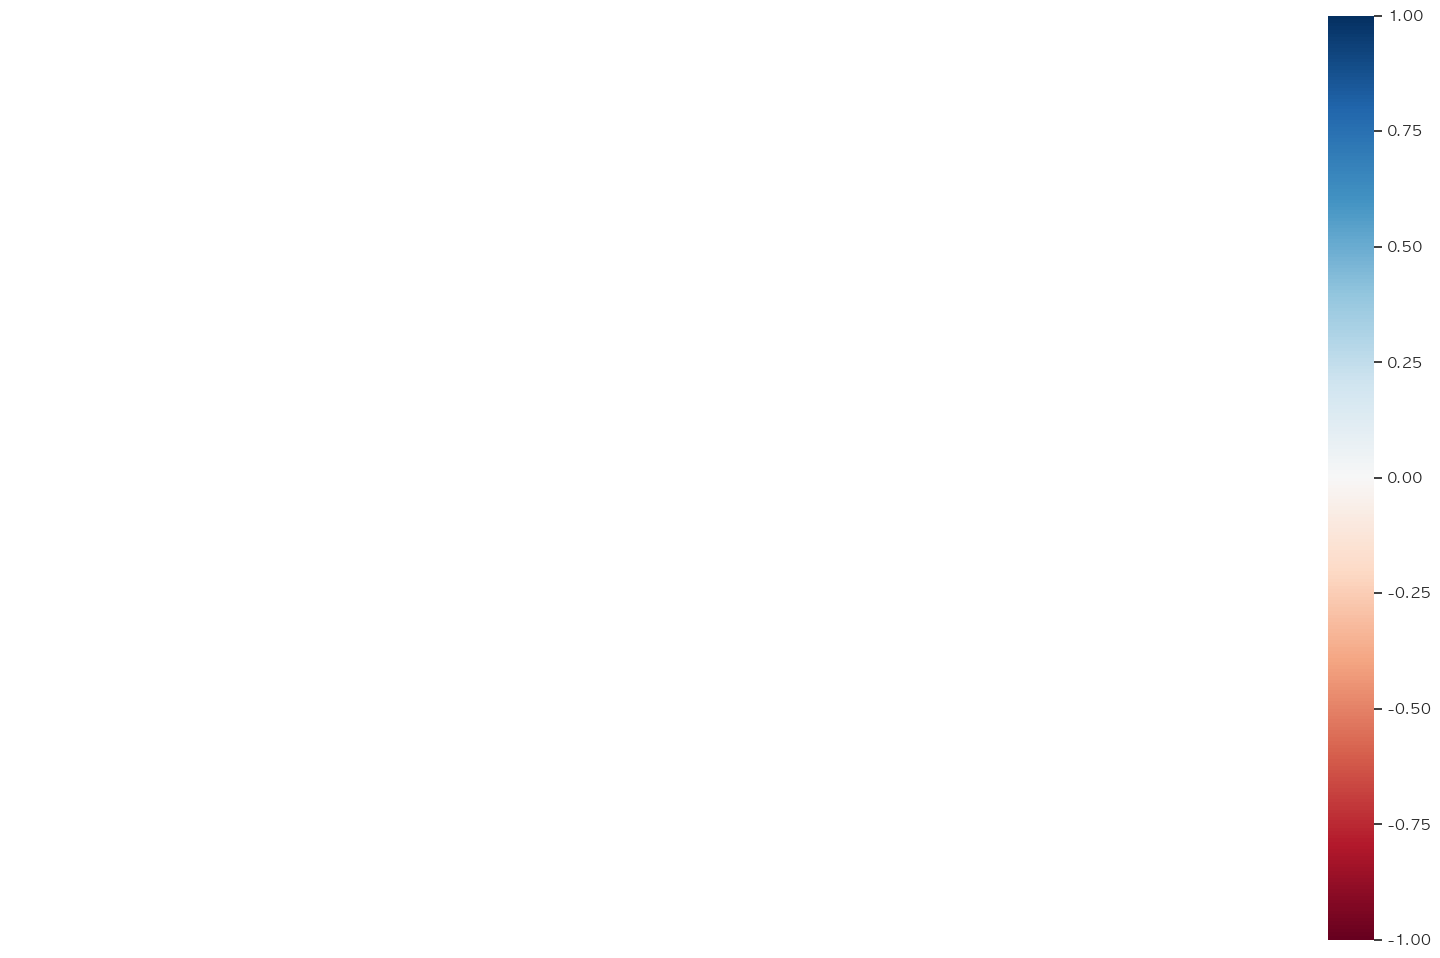

In [11]:
# 양의 상관 관계 : 하나의 변수에서 값이 누락될 때 다른 변수에서도 값이 누락될 가능성이 높은 것
# 음의 상관 관계 : 하나의 변수에서 값이 누락될 때 다른 변수에서는 값이 누락될 가능성이 낮은 것
# 0에 가까울 : 두 변수 값의 결측치값 유무가 서로 독립적이다.
missingno.heatmap(train_df)

In [12]:
# CSV 파일로 저장
train_df.to_csv('train_신용정보.csv', index=False, encoding='utf-8')
print("저장 완료")

저장 완료


In [13]:
import pandas as pd

df = pd.read_csv('/Users/kimgayeong/Desktop/파이널/작업/train_신용정보.csv')
pd.concat([df.iloc[:, :3], df.iloc[:, -3:]], axis=1)

,기준년월,ID,최초한도금액,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일
0,201810,TRAIN_000000,0,0,0,99999999
1,201810,TRAIN_000001,0,0,0,322
2,201810,TRAIN_000002,0,0,0,2374
3,201810,TRAIN_000003,0,0,0,99999999
4,201810,TRAIN_000004,0,0,0,99999999
...,...,...,...,...,...,...
2399995,201811,TRAIN_399995,0,0,0,99999999
2399996,201811,TRAIN_399996,0,0,0,99999999
2399997,201811,TRAIN_399997,0,0,0,99999999
2399998,201811,TRAIN_399998,0,0,0,99999999
